In [1]:
# subject# - Integer that uniquely identifies each subject
# age - Subject age
# sex - Subject gender '0' - male, '1' - female
# test_time - Time since recruitment into the trial. The integer part is the number of days since recruitment.
# motor_UPDRS - Clinician's motor UPDRS score, linearly interpolated
# total_UPDRS - Clinician's total UPDRS score, linearly interpolated
# Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of variation in fundamental frequency
# Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA - Several measures of variation in amplitude
# NHR,HNR - Two measures of ratio of noise to tonal components in the voice
# RPDE - A nonlinear dynamical compledataity measure
# DFA - Signal fractal scaling edataponent
# PPE - A nonlinear measure of fundamental frequency variation 


# Citation Request:

# If you use this dataset, please cite the following paper:
# A Tsanas, MA Little, PE McSharry, LO Ramig (2009)
# 'Accurate telemonitoring of Parkinson’s disease progression by non-invasive speech tests',
# IEEE Transactions on Biomedical Engineering (to appear). 

In [2]:
import pandas as pd
data= pd.read_csv("parkinsons_2009.csv")

In [3]:
data.drop(["subject#","test_time"], axis=1, inplace=True)

In [4]:
data.head()

,age,sex,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

from sklearn.cluster import KMeans

c:\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


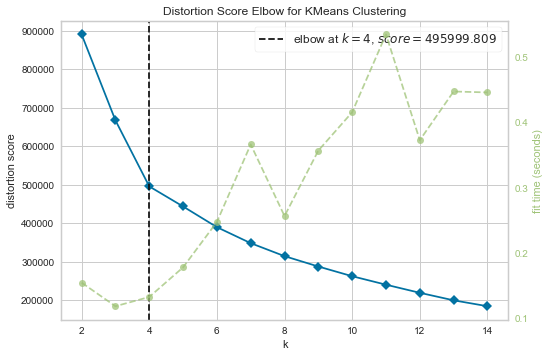

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:


from sklearn.cluster import KMeans
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init = 'k-means++',random_state=42)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15), timings= True)
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Training the K-Means model on the dataset 

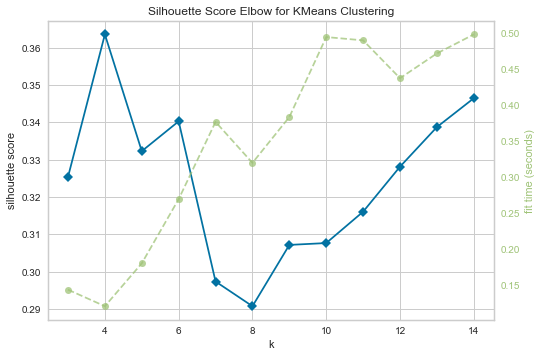

Optimal number of clusters based on silhouette score: [4]


In [7]:
# Silhouette Score for K means

model = KMeans(init = 'k-means++',random_state=42)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(3,15),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

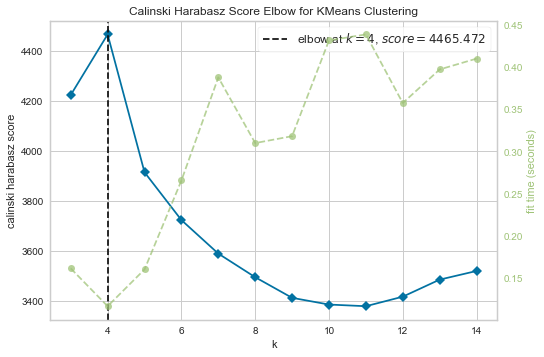

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [8]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans(init = 'k-means++',random_state=42)
visualizer = KElbowVisualizer(model, k=(3,15),metric='calinski_harabasz', timings= True)
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show() 

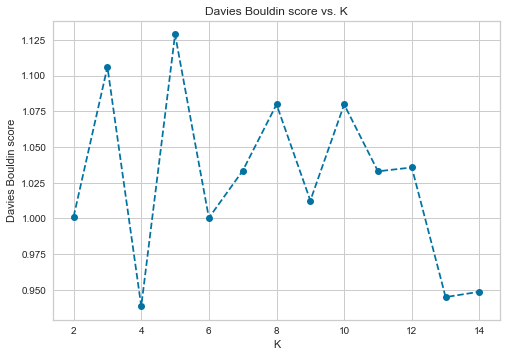

In [9]:
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, k):
    
    kmeans = KMeans(n_clusters=k, init = 'k-means++',random_state=42)
    model = kmeans.fit_predict(data)
    score = davies_bouldin_score(data, model)
    return score
scores = []
for center in range(2,15):
    scores.append(get_kmeans_score(data, center))
    
plt.plot(range(2,15), scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

In [10]:
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=4, random_state= 42, init = 'k-means++')
predictions = kmeans.fit_predict(data)
score_kemans_s = silhouette_score(data, kmeans.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(data, kmeans.labels_)
score_kemans_d = davies_bouldin_score(data, predictions)

print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.3636
Calinski Harabasz Score: 4465.4721
Davies Bouldin Score: 0.9385


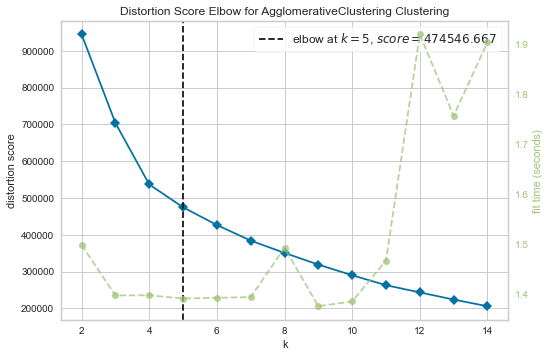

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
# Elbow Method for Heirarchical Clustering
from sklearn.cluster import MiniBatchKMeans


from sklearn.cluster import AgglomerativeClustering

# define dataset
# define the model


model = AgglomerativeClustering(affinity='euclidean', linkage='ward')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15), timings= True)
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

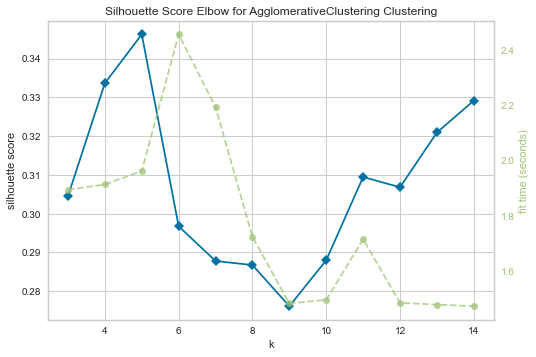

Optimal number of clusters based on silhouette score: [5]


In [12]:
# Silhouette Score for Hierarchical Clustering


model = AgglomerativeClustering(affinity='euclidean', linkage='ward')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(3,15),metric='silhouette', timings= True, locate_elbow=False)
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

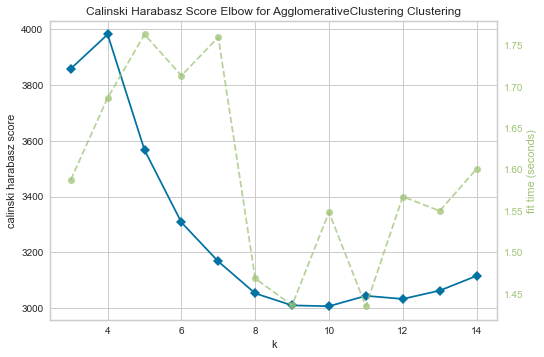

Optimal number of clusters based on silhouette score: [4]


In [13]:
# Calinski Harabasz Score for Hierarchical Clustering

model = AgglomerativeClustering(affinity='euclidean', linkage='ward')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(3,15),metric='calinski_harabasz', timings= True, locate_elbow=False)
visualizer.fit(data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


df3 = pd.DataFrame(visualizer.k_values_,columns=['centers'])
df3['scores'] = visualizer.k_scores_
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of clusters based on silhouette score:', df4['centers'].tolist())

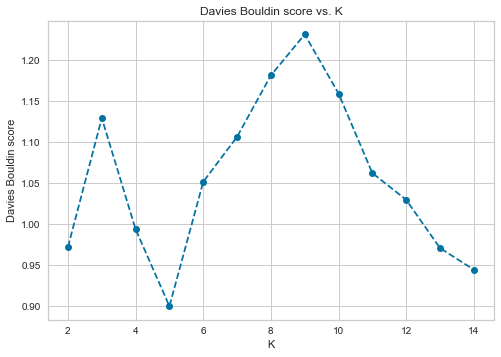

In [14]:
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, k):
    
    AG_clustering = AgglomerativeClustering(n_clusters= center,affinity='euclidean', linkage='ward')

    model = AG_clustering.fit_predict(data)
    score = davies_bouldin_score(data, model)
    return score
scores = []
for center in range(2,15):
    scores.append(get_kmeans_score(data, center))
    
plt.plot(range(2,15), scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

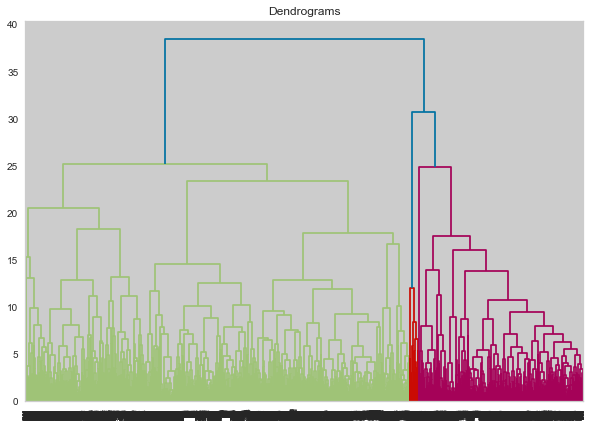

In [15]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='weighted',metric='euclidean'),orientation='top')

In [16]:
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

# define the model
model = AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='ward')
# fit model and predict clusters
yhat = model.fit(data)
yhat_2 = model.fit_predict(data)
# retrieve unique clusters
clusters = unique(yhat)


# Calculate cluster validation metrics

score_AGclustering_s = silhouette_score(data, yhat.labels_, metric='euclidean')

score_AGclustering_c = calinski_harabasz_score(data, yhat.labels_)

score_AGclustering_d = davies_bouldin_score(data, yhat_2)



print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)

print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.3462
Calinski Harabasz Score: 3566.2552
Davies Bouldin Score: 0.8998


4.07636505430749


<Figure size 360x360 with 0 Axes>

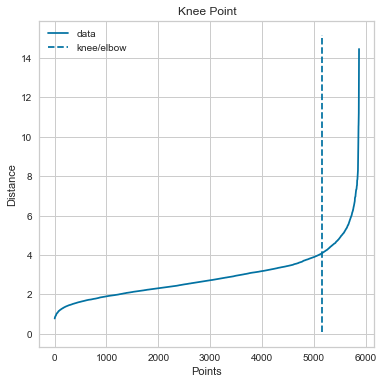

In [17]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=40)
neighbors = nearest_neighbors.fit(data)
distances, indices = neighbors.kneighbors(data)

distances = np.sort(distances[:,39], axis=0)

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Optimal number of min_samples based on silhouette score: [8, 9]


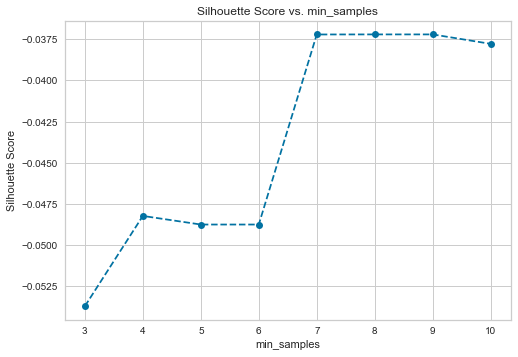

In [18]:
from sklearn.cluster import DBSCAN

def get_dbscan_score(data, center):

    #instantiate kmeans
    dbscan = DBSCAN(eps = 4.07636505430749, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(data)
    
    # Calculate Silhoutte Score

    score = silhouette_score(data, model.labels_, metric='euclidean')
    
    return score

scores = []
centers = list(range(3,11))

for center in centers:
    scores.append(get_dbscan_score(data, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. min_samples');

df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_samples based on silhouette score:', df4['min_samples'].tolist())

Optimal number of min_sample based on Calinski Harabasz score: [7]


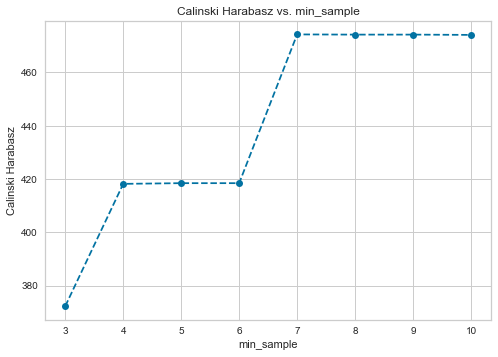

In [19]:
def get_dbscan_score(data, center):

    #instantiate dbscan
    dbscan = DBSCAN(eps = 4.07636505430749, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(data)
    
    # Calculate Silhoutte Score

    score = calinski_harabasz_score(data, dbscan.labels_)
    
    return score

scores = []
centers = list(range(3,11))

for center in centers:
    scores.append(get_dbscan_score(data, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_sample');
plt.ylabel('Calinski Harabasz');
plt.title('Calinski Harabasz vs. min_sample');

df3 = pd.DataFrame(centers,columns=['min_sample'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_sample based on Calinski Harabasz score:', df4['min_sample'].tolist())

Optimal number of min_samples based on DB score: [4]


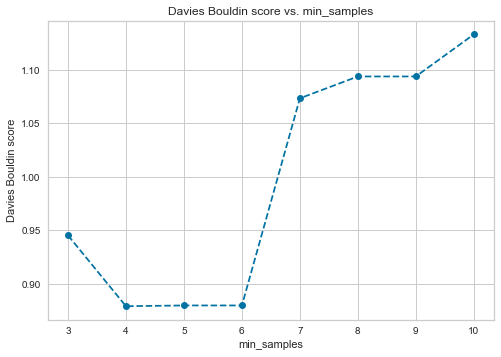

In [20]:
def get_dbscan_score(data, center):

    #instantiate dbscan
    dbscan = DBSCAN(eps = 4.07636505430749, min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit_predict(data)
    
    # Calculate Silhoutte Score

    score = davies_bouldin_score(data, model)
    
    return score

scores = []
centers = list(range(3,11))

for center in centers:
    scores.append(get_dbscan_score(data, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. min_samples');


df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of min_samples based on DB score:', df4['min_samples'].tolist())

In [21]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
# define the model
model = DBSCAN(eps=4.07636505430749, min_samples= 7)

# rule of thumb for min_samples: 2*len(data.columns)

# fit model and predict clusters
yhat = model.fit_predict(data)
# retrieve unique clusters
clusters = unique(yhat)


# Calculate cluster validation metrics

score_dbsacn_s = silhouette_score(data, yhat, metric='euclidean')

score_dbsacn_c = calinski_harabasz_score(data, yhat)

score_dbsacn_d = davies_bouldin_score(data, yhat)



print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: -0.0372
Calinski Harabasz Score: 474.2215
Davies Bouldin Score: 1.0734


In [22]:
from sklearn.mixture import GaussianMixture
n_components = range(2, 11)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 42)
        gmm.fit(data)
        score.append((cov,n_comp,gmm.bic(data)))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','BIC_Score']
score_2 = score_1[score_1.BIC_Score == score_1.BIC_Score.min()]

score_2.head()

c:\Python39\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


,Covariance_Type,N_Components,BIC_Score
34,full,9,-631024.448889


In [23]:
n_components = range(3, 11)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov,random_state = 42)
        model = gmm.fit(data)
        model_2 = model.predict(data)
        score_s = silhouette_score(data, model_2, metric='euclidean')
        score.append((cov,n_comp,score_s))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Silhouette_Score']
score_2 = score_1[score_1.Silhouette_Score == score_1.Silhouette_Score.max()]
score_2.head()

c:\Python39\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


,Covariance_Type,N_Components,Silhouette_Score
1,spherical,4,0.362578


In [24]:

n_components = range(3, 15)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 42)
        model = gmm.fit(data)
        model_2 = model.predict(data)
        score_c = calinski_harabasz_score(data, model_2)
        score.append((cov,n_comp,score_c))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Calinski_Harabasz_Score']
score_2 = score_1[score_1.Calinski_Harabasz_Score == score_1.Calinski_Harabasz_Score.max()]
score_2.head()

c:\Python39\lib\site-packages\sklearn\mixture\_base.py:277: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


,Covariance_Type,N_Components,Calinski_Harabasz_Score
1,spherical,4,4450.225242


In [25]:
n_components = range(3, 15)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, random_state = 10)
        model = gmm.fit(data)
        model_2 = model.predict(data)
        score_d = davies_bouldin_score(data, model_2)
        score.append((cov,n_comp,score_d))
score_1 = pd.DataFrame(score)
score_1.columns = ['Covariance_Type', 'N_Components','Davies_Bouldin_Score']
score_2 = score_1[score_1.Davies_Bouldin_Score == score_1.Davies_Bouldin_Score.max()]
score_2.head()

,Covariance_Type,N_Components,Davies_Bouldin_Score
29,diag,8,15.067991


In [26]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components= 4,covariance_type= "spherical", random_state = 42)
# fit the model
model.fit(data)
# assign a cluster to each example
yhat = model.predict(data)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation score
score_dbsacn_s = silhouette_score(data, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(data, yhat)
score_dbsacn_d = davies_bouldin_score(data, yhat)

print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.3626
Calinski Harabasz Score: 4450.2252
Davies Bouldin Score: 0.9365


In [27]:
data['clusters']=kmeans.labels_
data.head()


,age,sex,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,clusters
0,72,0,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,1
1,72,0,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,1
2,72,0,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,1
3,72,0,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,1
4,72,0,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,1


In [28]:
data['clusters'].value_counts()

2    1781
0    1408
3    1399
1    1287
Name: clusters, dtype: int64

In [29]:
data[data['clusters']==0].describe().loc[['min','max']]


,age,sex,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,clusters
min,66.0,0.0,10.737,15.263,0.00142,0.000006,0.00060,0.00079,0.00180,0.00786,...,0.00367,0.00462,0.00705,0.01102,0.001557,2.206,0.27236,0.51903,0.035155,0.0
max,85.0,1.0,29.824,35.564,0.07183,0.000379,0.04356,0.04744,0.13068,0.23915,...,0.16267,0.16246,0.16184,0.48802,0.725370,30.689,0.83070,0.83627,0.649910,0.0


In [30]:
data[data['clusters']==1].describe().loc[['min','max']]

,age,sex,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,clusters
min,56.0,0.0,24.206,33.503,0.00127,0.000006,0.00052,0.00064,0.00156,0.00631,...,0.00221,0.00259,0.00579,0.00664,0.001167,4.992,0.30097,0.52092,0.032858,1.0
max,76.0,1.0,39.511,54.992,0.04061,0.000290,0.02599,0.02326,0.07796,0.22221,...,0.14428,0.09692,0.11491,0.43283,0.470640,32.102,0.96608,0.80915,0.599570,1.0


In [31]:
data[data['clusters']==2].describe().loc[['min','max']]

,age,sex,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,clusters
min,36.0,0.0,5.0377,7.000,0.00083,0.000002,0.00033,0.00043,0.00098,0.00344,...,0.00172,0.00205,0.00299,0.00515,0.000286,3.295,0.15102,0.51468,0.021983,2.0
max,67.0,1.0,20.0280,27.773,0.09962,0.000201,0.05451,0.05513,0.16352,0.21805,...,0.10051,0.12370,0.13595,0.30154,0.591340,37.875,0.78034,0.82860,0.677900,2.0


In [32]:
data[data['clusters']==3].describe().loc[['min','max']]

,age,sex,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,clusters
min,49.0,0.0,16.792,23.610,0.00138,0.000006,0.00066,0.00079,0.00198,0.00306,...,0.00161,0.00194,0.00249,0.00484,0.001468,1.659,0.28219,0.51404,0.042494,3.0
max,66.0,1.0,33.858,44.469,0.09999,0.000446,0.05754,0.06956,0.17263,0.26863,...,0.12795,0.16702,0.27546,0.38385,0.748260,30.794,0.94792,0.86560,0.731730,3.0
